In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import roc_auc_score
from pycaret import classification
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

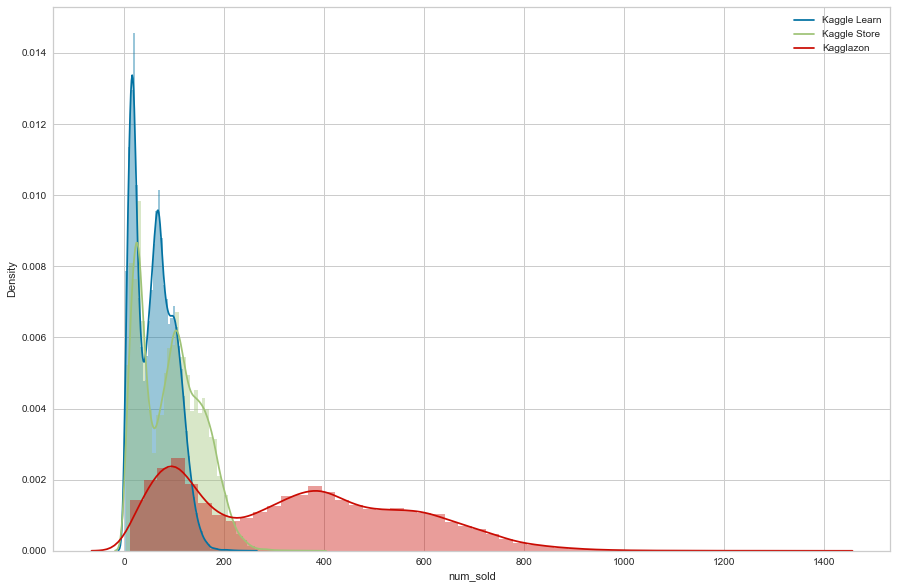

In [3]:
plt.figure(figsize=(15,10))
for i in train.store.unique():
    sns.distplot(train[train['store']==i]['num_sold'])
plt.legend(train.store.unique())

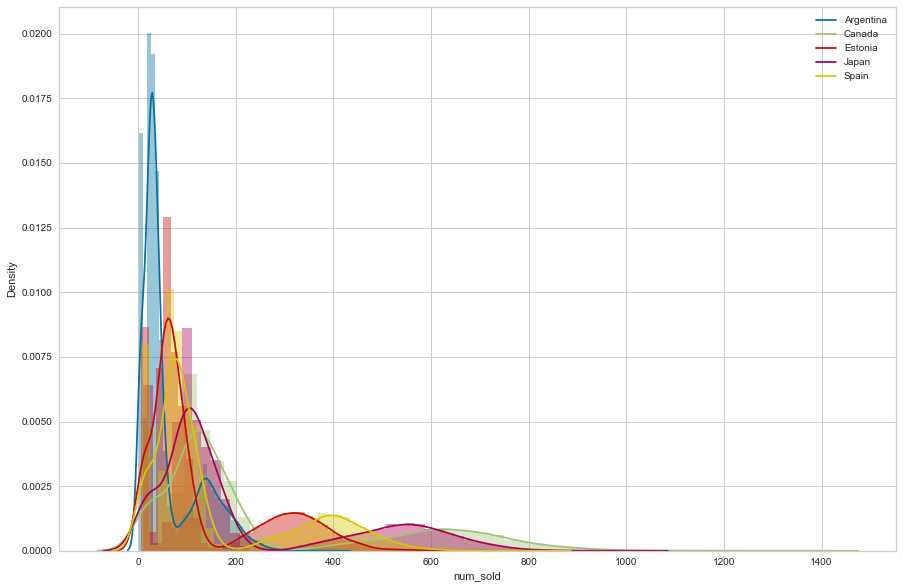

In [4]:
plt.figure(figsize=(15,10))
for i in train.country.unique():
    sns.distplot(train[train['country']==i]['num_sold'])
plt.legend(train.country.unique())

In [5]:
train.store.value_counts()

Kaggle Learn    45650
Kaggle Store    45650
Kagglazon       45650
Name: store, dtype: int64

In [6]:
train.country.value_counts()

Argentina    27390
Canada       27390
Estonia      27390
Japan        27390
Spain        27390
Name: country, dtype: int64

In [7]:
train[(train['country']=='Spain')&(train['store']=='Kagglazon')]['product']

70                     Using LLMs to Improve Your Coding
71                         Using LLMs to Train More LLMs
72        Using LLMs to Win Friends and Influence People
73            Using LLMs to Win More Kaggle Competitions
74                            Using LLMs to Write Better
                               ...                      
136945                 Using LLMs to Improve Your Coding
136946                     Using LLMs to Train More LLMs
136947    Using LLMs to Win Friends and Influence People
136948        Using LLMs to Win More Kaggle Competitions
136949                        Using LLMs to Write Better
Name: product, Length: 9130, dtype: object

In [8]:
train[(train['country']=='Japan')&(train['store']=='Kagglazon')]['product'].value_counts()

Using LLMs to Improve Your Coding                 1826
Using LLMs to Train More LLMs                     1826
Using LLMs to Win Friends and Influence People    1826
Using LLMs to Win More Kaggle Competitions        1826
Using LLMs to Write Better                        1826
Name: product, dtype: int64

---

# simple submission

In [57]:
data_patiotion = []
for i in train['country'].unique():
    for j in train['store'].unique():
        for k in train['product'].unique():
            tp = (train[(train['country']==i)&(train['store']==j)&(train['product']==k)])
            tp = tp.reset_index(drop=True)
            tp = tp.drop('id',axis=1)
            temp = [i.split('-') for i in tp['date']]
            tp['year'] = [i[0] for i in temp]
            tp['month'] = [i[1] for i in temp]
            tp['day'] = [i[2] for i in temp]
            tp['year'] = tp['year'].astype('int')
            tp['month'] = tp['month'].astype('int')
            tp['day'] = tp['day'].astype('int')

            tp = tp.drop('date',axis=1)
            tp = tp.drop(['country','store','product'],axis=1)

            data_patiotion.append(tp)
data_patiotion

[      num_sold  year  month  day
 0           63  2017      1    1
 1           51  2017      1    2
 2           44  2017      1    3
 3           44  2017      1    4
 4           40  2017      1    5
 ...        ...   ...    ...  ...
 1821        41  2021     12   27
 1822        38  2021     12   28
 1823        46  2021     12   29
 1824        45  2021     12   30
 1825        44  2021     12   31
 
 [1826 rows x 4 columns],
       num_sold  year  month  day
 0           66  2017      1    1
 1           47  2017      1    2
 2           45  2017      1    3
 3           42  2017      1    4
 4           46  2017      1    5
 ...        ...   ...    ...  ...
 1821        34  2021     12   27
 1822        44  2021     12   28
 1823        43  2021     12   29
 1824        44  2021     12   30
 1825        47  2021     12   31
 
 [1826 rows x 4 columns],
       num_sold  year  month  day
 0            9  2017      1    1
 1            7  2017      1    2
 2            7  2017     

In [58]:
test_patiotion = []
for i in test['country'].unique():
    for j in test['store'].unique():
        for k in test['product'].unique():
            tp = (test[(train['country']==i)&(test['store']==j)&(test['product']==k)])
            tp = tp.reset_index(drop=True)
            # tp = tp.drop('id',axis=1)
            temp = [i.split('-') for i in tp['date']]
            tp['year'] = [i[0] for i in temp]
            tp['month'] = [i[1] for i in temp]
            tp['day'] = [i[2] for i in temp]
            tp['year'] = tp['year'].astype('int')
            tp['month'] = tp['month'].astype('int')
            tp['day'] = tp['day'].astype('int')
            tp = tp.drop('date',axis=1)
            tp = tp.drop(['country','store','product'],axis=1)

            test_patiotion.append(tp)
test_patiotion

[     year  month  day
 0    2022      1    1
 1    2022      1    2
 2    2022      1    3
 3    2022      1    4
 4    2022      1    5
 ..    ...    ...  ...
 360  2022     12   27
 361  2022     12   28
 362  2022     12   29
 363  2022     12   30
 364  2022     12   31
 
 [365 rows x 3 columns],
      year  month  day
 0    2022      1    1
 1    2022      1    2
 2    2022      1    3
 3    2022      1    4
 4    2022      1    5
 ..    ...    ...  ...
 360  2022     12   27
 361  2022     12   28
 362  2022     12   29
 363  2022     12   30
 364  2022     12   31
 
 [365 rows x 3 columns],
      year  month  day
 0    2022      1    1
 1    2022      1    2
 2    2022      1    3
 3    2022      1    4
 4    2022      1    5
 ..    ...    ...  ...
 360  2022     12   27
 361  2022     12   28
 362  2022     12   29
 363  2022     12   30
 364  2022     12   31
 
 [365 rows x 3 columns],
      year  month  day
 0    2022      1    1
 1    2022      1    2
 2    2022      1    3

In [62]:
train

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [63]:
test

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


---

In [ ]:
from pycaret import regression
for i in range(len(data_patiotion)):
    regression.setup(data=data_patiotion[0],target='num_sold',
                         train_size=0.8,
                         session_id=77)
    best = regression.compare_models(n_select=5)
    pred = np.array([j.predict(test_patiotion[i].loc[:,['year','month','day']]) for j in best]).mean(0)
    test_patiotion[i]['pred'] = pred

,Description,Value
0,Session id,77
1,Target,num_sold
2,Target type,Regression
3,Original data shape,"(1826, 4)"
4,Transformed data shape,"(1826, 4)"
5,Transformed train set shape,"(1460, 4)"
6,Transformed test set shape,"(366, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.4197,9.7061,3.1049,0.8364,0.0976,0.0818,1.2310
et,Extra Trees Regressor,2.3529,9.8096,3.1244,0.8346,0.0967,0.0785,1.3260
catboost,CatBoost Regressor,2.4854,10.1762,3.1804,0.8288,0.0994,0.0835,1.3850
lightgbm,Light Gradient Boosting Machine,2.4972,10.4228,3.2150,0.8250,0.0997,0.0835,1.2100
rf,Random Forest Regressor,2.5431,11.2825,3.3512,0.8095,0.1023,0.0845,1.3190
xgboost,Extreme Gradient Boosting,2.7429,12.5270,3.5335,0.7889,0.1102,0.0919,1.2500
ada,AdaBoost Regressor,3.1554,15.5206,3.9355,0.7371,0.1336,0.1161,1.2650
knn,K Neighbors Regressor,3.0800,15.9019,3.9789,0.7308,0.1302,0.1071,1.2220
dt,Decision Tree Regressor,3.0171,16.9582,4.0993,0.7154,0.1240,0.1005,1.2180
br,Bayesian Ridge,4.5787,31.9364,5.6434,0.4576,0.1961,0.1692,1.2260


Processing:   0%|          | 0/89 [00:00<?, ?it/s]

,Description,Value
0,Session id,77
1,Target,num_sold
2,Target type,Regression
3,Original data shape,"(1826, 4)"
4,Transformed data shape,"(1826, 4)"
5,Transformed train set shape,"(1460, 4)"
6,Transformed test set shape,"(366, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.4197,9.7061,3.1049,0.8364,0.0976,0.0818,1.2420
et,Extra Trees Regressor,2.3529,9.8096,3.1244,0.8346,0.0967,0.0785,1.2630
catboost,CatBoost Regressor,2.4854,10.1762,3.1804,0.8288,0.0994,0.0835,1.2370
lightgbm,Light Gradient Boosting Machine,2.4972,10.4228,3.2150,0.8250,0.0997,0.0835,1.2390
rf,Random Forest Regressor,2.5431,11.2825,3.3512,0.8095,0.1023,0.0845,1.2400
xgboost,Extreme Gradient Boosting,2.7429,12.5270,3.5335,0.7889,0.1102,0.0919,1.2250
ada,AdaBoost Regressor,3.1554,15.5206,3.9355,0.7371,0.1336,0.1161,1.2430
knn,K Neighbors Regressor,3.0800,15.9019,3.9789,0.7308,0.1302,0.1071,1.2100
dt,Decision Tree Regressor,3.0171,16.9582,4.0993,0.7154,0.1240,0.1005,1.2230
br,Bayesian Ridge,4.5787,31.9364,5.6434,0.4576,0.1961,0.1692,1.2180


Processing:   0%|          | 0/89 [00:00<?, ?it/s]

,Description,Value
0,Session id,77
1,Target,num_sold
2,Target type,Regression
3,Original data shape,"(1826, 4)"
4,Transformed data shape,"(1826, 4)"
5,Transformed train set shape,"(1460, 4)"
6,Transformed test set shape,"(366, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:57:28
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Passive Aggressive Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,4.5787,31.9364,5.6434,0.4576,0.1961,0.1692,1.2330
lr,Linear Regression,4.5795,31.9358,5.6433,0.4575,0.1962,0.1692,1.2600
ridge,Ridge Regression,4.5794,31.9358,5.6433,0.4575,0.1962,0.1692,1.2330
lar,Least Angle Regression,4.5795,31.9358,5.6433,0.4575,0.1962,0.1692,1.2110
lasso,Lasso Regression,4.5656,32.5380,5.6976,0.4493,0.1949,0.1683,1.2040
llar,Lasso Least Angle Regression,4.5656,32.5380,5.6976,0.4493,0.1949,0.1683,1.2360
en,Elastic Net,4.5942,33.4148,5.7739,0.4356,0.1959,0.1690,1.2420
omp,Orthogonal Matching Pursuit,5.6494,52.2852,7.2185,0.1222,0.2372,0.2045,1.2580


Processing:   0%|          | 0/89 [00:00<?, ?it/s]

In [13]:
# from statsforecast import StatsForecast
# from statsforecast.models import Naive, SeasonalNaive, WindowAverage, SeasonalWindowAverage

# tp = train[(train['country']=='Japan')&(train['store']=='Kagglazon')&(train['product']=='Using LLMs to Improve Your Coding')]
# data = pd.DataFrame()
# data['ds'] = tp['date']
# data['unique_id'] = tp['country']
# data['y'] = tp['num_sold']
# data
# model = StatsForecast(models=[Naive(), 
#                               SeasonalNaive(season_length=7), 
#                               WindowAverage(window_size=7), 
#                               SeasonalWindowAverage(window_size=2, season_length=7)],
#                       freq='D', n_jobs=-1)
# model.fit(data)

In [25]:
# from tensorflow import keras
# Sequential = keras.models.Sequential
# Dense = keras.layers.Dense
# LSTM = keras.layers.LSTM

# model = Sequential()
# model.add(LSTM(
#     5,
#     input_shape=train[0].shape,
#     activation='relu'
# ))
# model.add(Dense(1))

# model.compile(loss=loss,optimizer='adam')
# model.fit(x_train,y_train,epochs=20,batch_size=2)
